In [3]:
!apt-get install -y tesseract-ocr
!apt-get install -y tesseract-ocr-ind
!pip install pytesseract opencv-python pillow

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-ind is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [4]:
from google.colab import files
import cv2
from PIL import Image
import pytesseract
import numpy as np
from matplotlib import pyplot as plt

In [11]:
import re
import json

Saving struk_8.jpg to struk_8.jpg


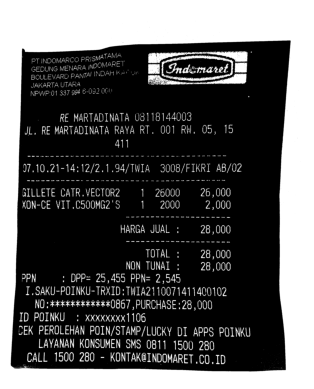

Extracted Text (Indonesian):
PN AA Nan AAN ia
NN NON AN Ta aN IA AAN : 2
ANN NAN CNN Dl SA aa ih Maa
JAKARTA UTARA 2
Na NET Res ERA

N 1 FA TA, | vi Fan

EA
“Ta
PN

Aap

RE MARTADINATA 08118144003
JL. RE MARTADINATA RAYA RT. 001 RW. 05, 15
411

anti aan lee na nol nan Pa NN Na ana an na titan Pat naa na te

97.10.21-14:12/2.1.94/TWIA  3008/FIKRI AB/02

Pa SNN et eoika tete Pa aini

SILLETE CATR.VECTOR2 — 1 26000 26,000
XON-CE VIT.C500MG2 5S 1 2000 PARU

AON Ra YO NN
NON TUNAI : 28,000
PPN : DPP- 25,455 PPN- 2,545
TI. SAKU-POINKU- TRXID : TWIA2110071411400102
NN LL LAU OjON MA ON ni Ual Yee Lo MARIO
DMLUN aan 0 000000 UMN Oa
CEK PEROLEHAN POIN/STAMP/LUCKY DI APPS POTINKU
LAYANAN KONSUMEN SMS 0811 1500 280
— CALL 1500 280 - KONTAK@INDOMARET.CO.ID -

 



In [5]:
uploaded = files.upload()
img_path = list(uploaded.keys())[0]
image = cv2.imread(img_path)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

processed_image = Image.fromarray(thresh)
text = pytesseract.image_to_string(processed_image, lang='ind')

print("Extracted Text (Indonesian):")
print(text)

In [12]:
pattern = r"([A-Z0-9 .-]+)\s—\s(\d+)\s(\d+)\s([\d,]+|[A-Z]+)"
matches = re.findall(pattern, text)

items = []
for match in matches:
    item_name, qty, unit_price, total_price = match
    items.append({
        "item_name": item_name.strip(),
        "quantity": int(qty),
        "unit_price": int(unit_price),
        "total_price": total_price if total_price.isalpha() else int(total_price.replace(",", ""))
    })

result_json = json.dumps(items, indent=4)
print(result_json)

[
    {
        "item_name": "SILLETE CATR.VECTOR2",
        "quantity": 1,
        "unit_price": 26000,
        "total_price": 26000
    }
]
